In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/dataset/synthetic_insurance_data.csv")  

display(df.head())

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

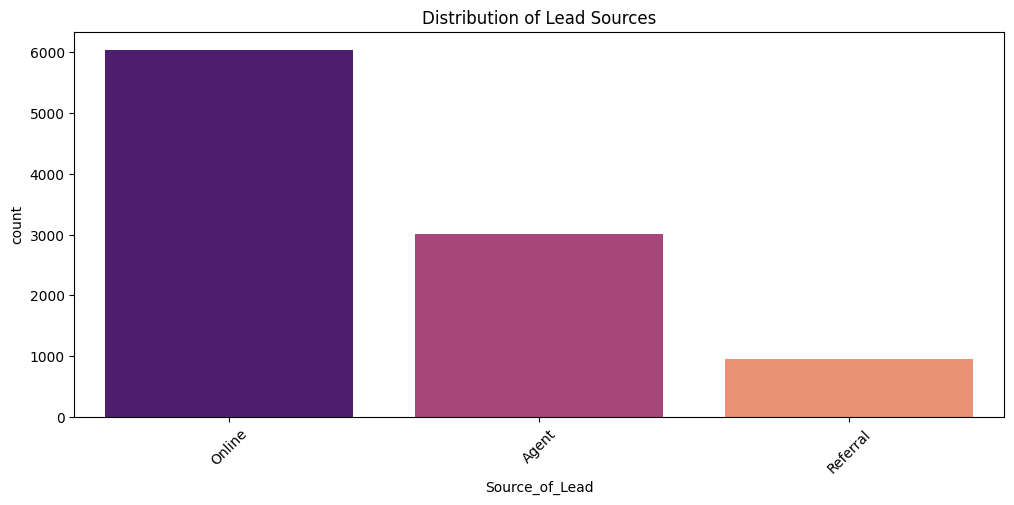

In [52]:
# Countplot of Source of Lead
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Source_of_Lead', order=df['Source_of_Lead'].value_counts().index, palette='magma')
plt.xticks(rotation=45)
plt.title("Distribution of Lead Sources")
plt.show()

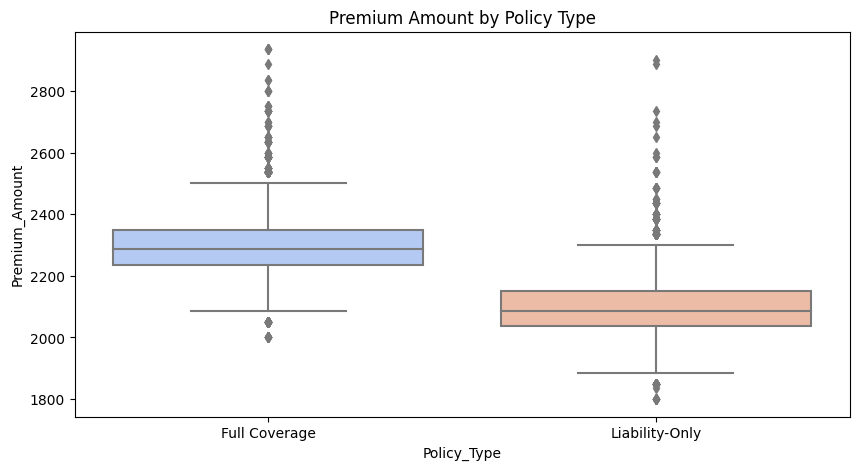

In [53]:
# Boxplot of Premium Amount by Policy Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Policy_Type', y='Premium_Amount', palette='coolwarm')
plt.title("Premium Amount by Policy Type")
plt.show()

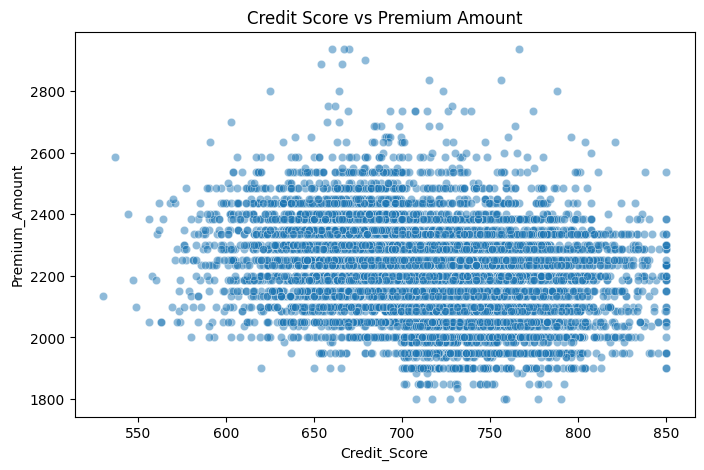

In [54]:
# Relationship between Credit Score and Premium Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Credit_Score', y='Premium_Amount', alpha=0.5)
plt.title("Credit Score vs Premium Amount")
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


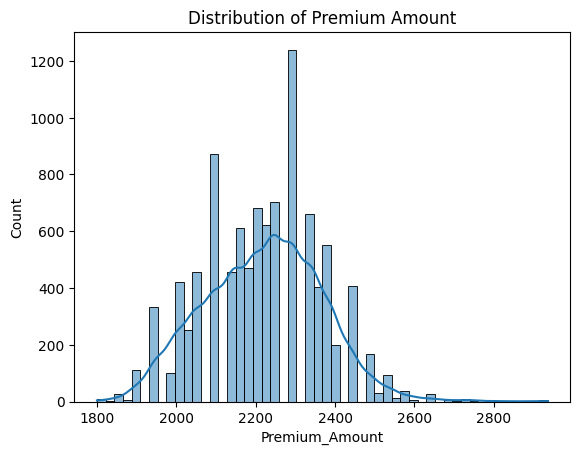

In [55]:
# Distribution of Premium Amount
sns.histplot(df['Premium_Amount'], kde=True)
plt.title('Distribution of Premium Amount')
plt.show()

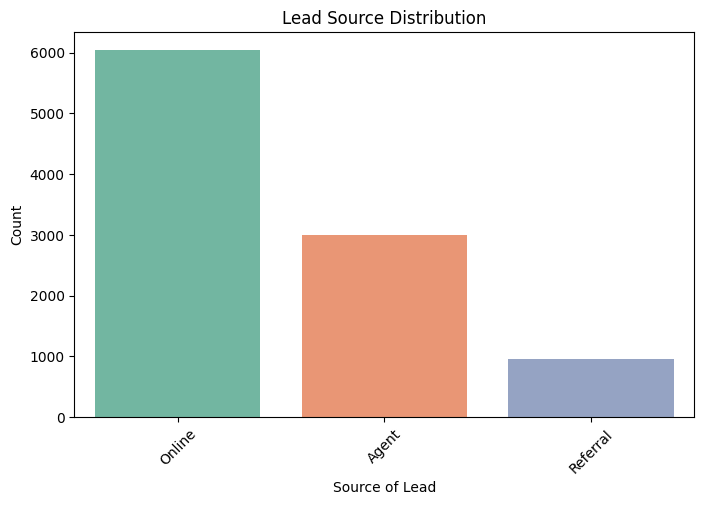

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Source_of_Lead', 
              order=df['Source_of_Lead'].value_counts().index, 
              palette='Set2')  # You can use different palettes like 'Set2', 'husl', etc.

# Add title and labels
plt.title("Lead Source Distribution")
plt.xlabel("Source of Lead")
plt.ylabel("Count")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

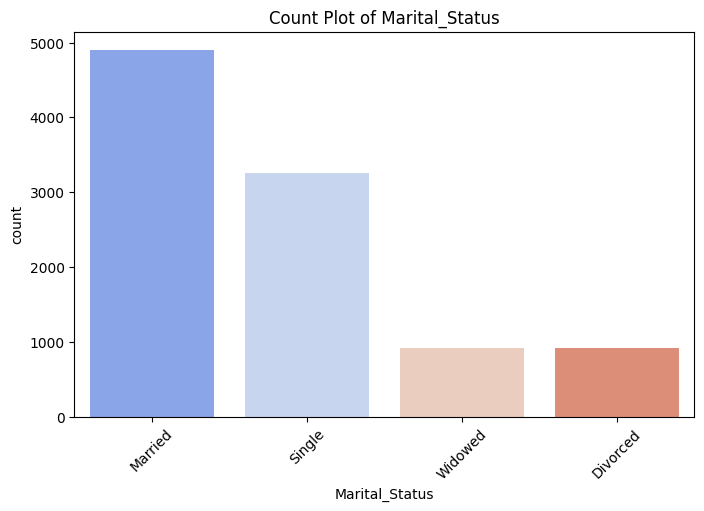

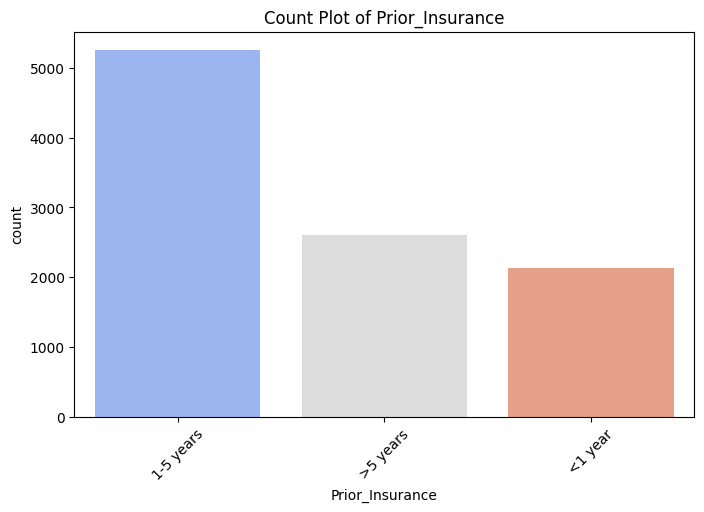

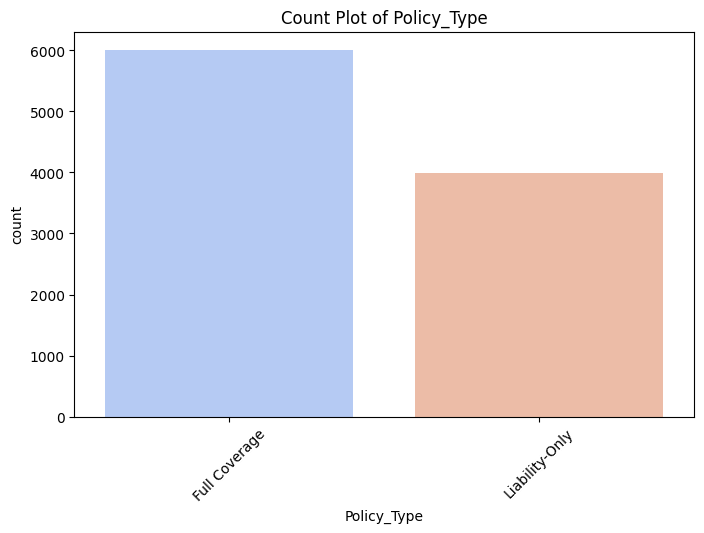

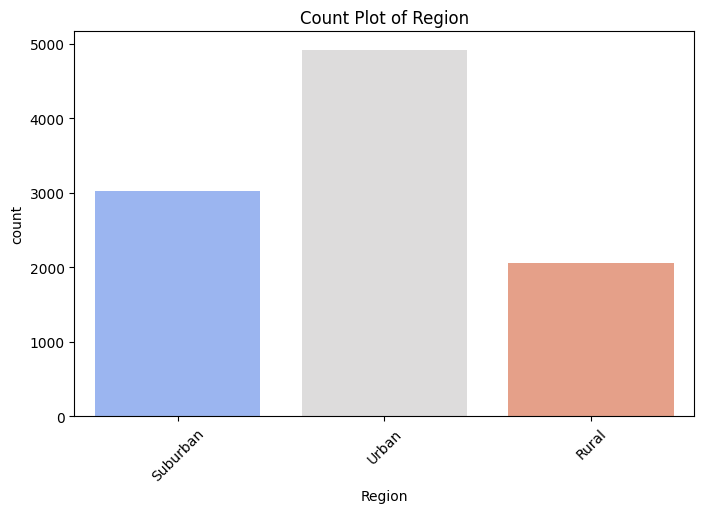

In [68]:
# Count Plots (Categorical Data)
categorical_cols = ['Marital_Status', 'Prior_Insurance', 'Policy_Type', 'Region']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col], palette='coolwarm')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Marital_Status', 'Prior_Insurance', 'Claims_Severity', 
                                 'Policy_Type', 'Source_of_Lead', 'Region'], drop_first=True)

In [ ]:
# Feature scaling for numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Premium_Amount', 'Credit_Score', 'Time_to_Conversion']

# Z-score outlier removal for numerical columns
for col in num_cols:
    df[col + '_Z_Score'] = zscore(df[col])
    df = df[df[col + '_Z_Score'].abs() <= 3]  

# Drop the '_Z_Score' columns
df.drop(columns=[col + '_Z_Score' for col in num_cols], inplace=True)

# Apply Robust Scaling to mitigate the influence of outliers
robust_scaler = RobustScaler()
df[num_cols] = robust_scaler.fit_transform(df[num_cols])

# Check the changes
print(f"Shape of dataset after removing outliers and scaling: {df.shape}")

In [ ]:
# Split features (X) and target (y)
X = df.drop(columns=['Conversion_Status'])  
y = df['Conversion_Status']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Shape of dataset after removing outliers and scaling: (9925, 33)
X_train shape: (7940, 32)
X_test shape: (1985, 32)


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


# Initialize the SVM model
svm_model = SVC(random_state=42, class_weight='balanced')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM - F1 Score:", f1_score(y_test, y_pred_svm))
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Cross-validation
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='f1')
print("SVM - Cross-validation F1 scores:", cv_scores_svm)
print("SVM - Mean F1 score from cross-validation:", cv_scores_svm.mean())

SVM - Accuracy: 0.5153652392947103
SVM - F1 Score: 0.5056526207605344
SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.52       854
           1       0.60      0.44      0.51      1131

    accuracy                           0.52      1985
   macro avg       0.53      0.53      0.52      1985
weighted avg       0.54      0.52      0.51      1985

SVM - Confusion Matrix:
 [[531 323]
 [639 492]]
SVM - Cross-validation F1 scores: [0.55138821 0.52968037 0.47884306 0.51922117 0.50679206]
SVM - Mean F1 score from cross-validation: 0.517184973634277


In [20]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Anomaly Detection with One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')  
ocsvm.fit(X_train)

# Predict anomalies 
ocsvm_predictions = ocsvm.predict(X_test)

# Convert to 0 for normal, 1 for anomaly for easy evaluation
ocsvm_predictions = [0 if pred == 1 else 1 for pred in ocsvm_predictions]


# Print classification results (assuming you don't have ground truth anomalies)
print("One-Class SVM Anomaly Detection:")
print(confusion_matrix(y_test, ocsvm_predictions))
print(classification_report(y_test, ocsvm_predictions))

One-Class SVM Anomaly Detection:
[[ 773   81]
 [1023  108]]
              precision    recall  f1-score   support

           0       0.43      0.91      0.58       854
           1       0.57      0.10      0.16      1131

    accuracy                           0.44      1985
   macro avg       0.50      0.50      0.37      1985
weighted avg       0.51      0.44      0.34      1985



In [21]:
# Anomaly Detection with Isolation Forest
iforest = IsolationForest(contamination=0.05)  
iforest.fit(X_train)

# Predict anomalies (1: normal, -1: anomaly)
iforest_predictions = iforest.predict(X_test)
iforest_predictions = [0 if pred == 1 else 1 for pred in iforest_predictions]

print("\nIsolation Forest Anomaly Detection:")
print(confusion_matrix(y_test, iforest_predictions))
print(classification_report(y_test, iforest_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Isolation Forest Anomaly Detection:
[[ 804   50]
 [1075   56]]
              precision    recall  f1-score   support

           0       0.43      0.94      0.59       854
           1       0.53      0.05      0.09      1131

    accuracy                           0.43      1985
   macro avg       0.48      0.50      0.34      1985
weighted avg       0.49      0.43      0.30      1985



In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the training data
dbscan.fit(X_train)

# Predict clusters for the test data
dbscan_predictions = dbscan.fit_predict(X_test)

dbscan_predictions = [0 if pred != -1 else 1 for pred in dbscan_predictions]

# Evaluate the model's performance
print("DBSCAN Anomaly Detection:")
print(confusion_matrix(y_test, dbscan_predictions))
print(classification_report(y_test, dbscan_predictions))

DBSCAN Anomaly Detection:
[[   0  854]
 [   0 1131]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       854
           1       0.57      1.00      0.73      1131

    accuracy                           0.57      1985
   macro avg       0.28      0.50      0.36      1985
weighted avg       0.32      0.57      0.41      1985



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X_train)
kmeans_predictions = kmeans.predict(X_test)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

normal_cluster = 0 if sum(kmeans.labels_ == 0) > sum(kmeans.labels_ == 1) else 1
anomalous_cluster = 1 - normal_cluster

kmeans_predictions = [normal_cluster if pred == normal_cluster else anomalous_cluster for pred in kmeans_predictions]

print("K-Means Anomaly Detection:")
print(confusion_matrix(y_test, kmeans_predictions))
print(classification_report(y_test, kmeans_predictions))


K-Means Anomaly Detection:
[[315 539]
 [464 667]]
              precision    recall  f1-score   support

           0       0.40      0.37      0.39       854
           1       0.55      0.59      0.57      1131

    accuracy                           0.49      1985
   macro avg       0.48      0.48      0.48      1985
weighted avg       0.49      0.49      0.49      1985



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Target
X = df.drop(columns=['Conversion_Status'])  
y = df['Conversion_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AgglomerativeClustering model
hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

hierarchical.fit(X_train)

hierarchical_predictions = hierarchical.fit_predict(X_test)

normal_cluster = 0 if sum(hierarchical_predictions == 0) > sum(hierarchical_predictions == 1) else 1
anomalous_cluster = 1 - normal_cluster


hierarchical_predictions = [normal_cluster if pred == normal_cluster else anomalous_cluster for pred in hierarchical_predictions]

# Evaluate the model's performance
print("Hierarchical Clustering Anomaly Detection:")
print(confusion_matrix(y_test, hierarchical_predictions))
print(classification_report(y_test, hierarchical_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical Clustering Anomaly Detection:
[[339 515]
 [497 634]]
              precision    recall  f1-score   support

           0       0.41      0.40      0.40       854
           1       0.55      0.56      0.56      1131

    accuracy                           0.49      1985
   macro avg       0.48      0.48      0.48      1985
weighted avg       0.49      0.49      0.49      1985



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Conversion_Status'])  
y = df['Conversion_Status'] 

X.columns = X.columns.astype(str)
X.columns = X.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_').str.replace('>', '_')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_res)

y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [0 if pred == 1 else 1 for pred in y_pred_iso]  # Convert predictions (1 -> 0, -1 -> 1)

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test)

final_predictions = [x if x == 1 else y for x, y in zip(y_pred_iso, y_pred_xgb)]

print("Ensemble Isolation Forest + XGBoost Classification Report:")
print(confusion_matrix(y_test, final_predictions))
print(classification_report(y_test, final_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Ensemble Isolation Forest + XGBoost Classification Report:
[[ 758   96]
 [   0 1131]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       854
           1       0.92      1.00      0.96      1131

    accuracy                           0.95      1985
   macro avg       0.96      0.94      0.95      1985
weighted avg       0.96      0.95      0.95      1985



In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes - F1 Score:", f1_score(y_test, y_pred_nb))
print("Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Cross-validation
cv_scores_nb = cross_val_score(nb_model, X, y, cv=5, scoring='f1')
print("Naive Bayes - Cross-validation F1 scores:", cv_scores_nb)
print("Naive Bayes - Mean F1 score from cross-validation:", cv_scores_nb.mean())

Naive Bayes - Accuracy: 1.0
Naive Bayes - F1 Score: 1.0
Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      1985
   macro avg       1.00      1.00      1.00      1985
weighted avg       1.00      1.00      1.00      1985

Naive Bayes - Confusion Matrix:
 [[ 854    0]
 [   0 1131]]
Naive Bayes - Cross-validation F1 scores: [1. 1. 1. 1. 1.]
Naive Bayes - Mean F1 score from cross-validation: 1.0


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest - Accuracy: 1.0
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      1985
   macro avg       1.00      1.00      1.00      1985
weighted avg       1.00      1.00      1.00      1985

Random Forest - Confusion Matrix:
 [[ 854    0]
 [   0 1131]]


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Conversion_Status']) 
y = df['Conversion_Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_res_scaled, y_train_res)

y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbors Classification Report:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
[[ 766   88]
 [  78 1053]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       854
           1       0.92      0.93      0.93      1131

    accuracy                           0.92      1985
   macro avg       0.92      0.91      0.91      1985
weighted avg       0.92      0.92      0.92      1985



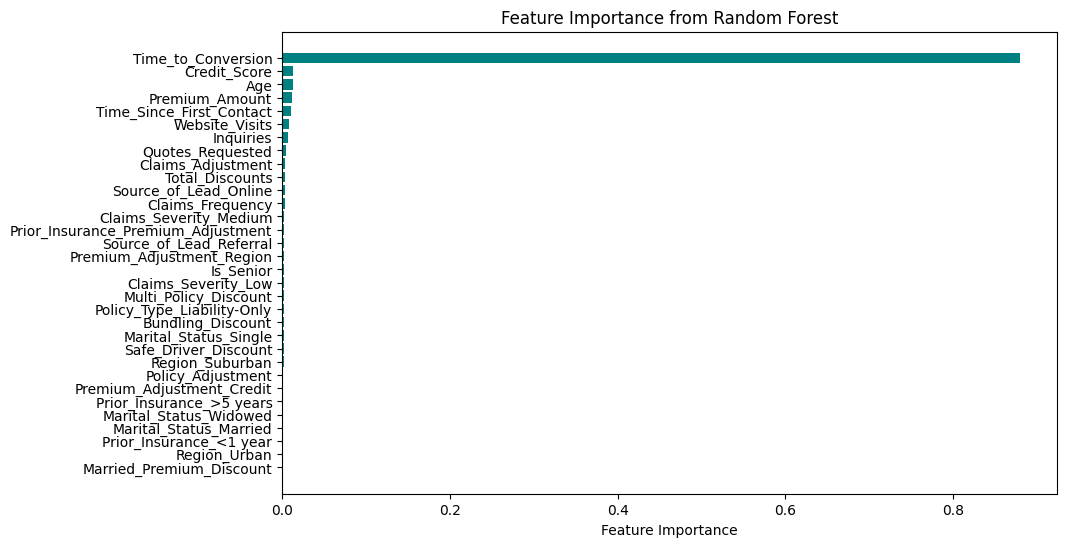

In [45]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res_scaled, y_train_res)

importances = rf_model.feature_importances_
features = X_train_res.columns

sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

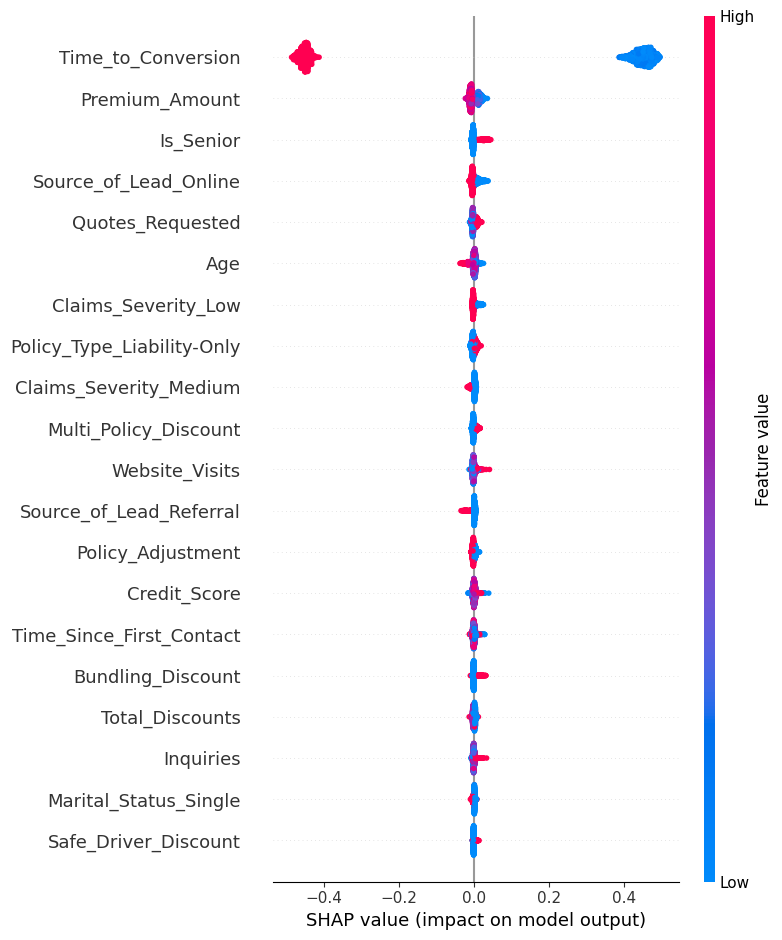

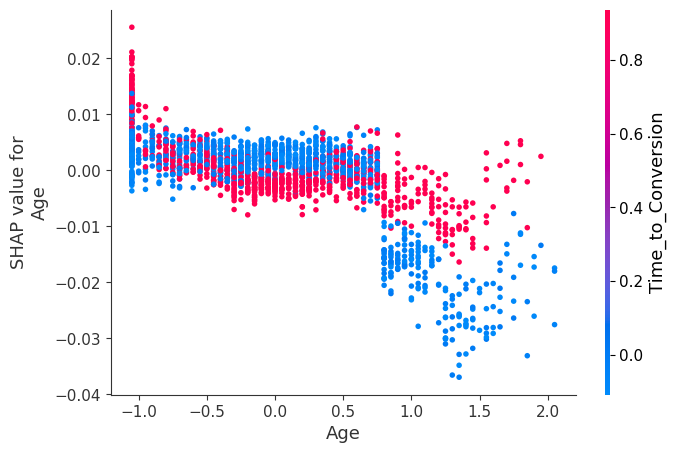

In [46]:
import shap

# SHAP Explainer for RandomForest
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values[1], X_test)  
shap.dependence_plot('Age', shap_values[1], X_test)